In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")


In [2]:
# for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering #it separates data into clusters using the hierarchical clustering solution
from yellowbrick.cluster import KElbowVisualizer #a visualization tool used to determine the optimal number of clusters in a clustering algorithm


In [3]:
df = pd.read_csv("WHR2023.csv")

In [4]:
df

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [7]:
top_df=df.nlargest(10,"Ladder score")

In [8]:
top_df

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
5,Sweden,7.395,0.037,7.468,7.322,10.883,0.939,72.150,0.948,0.165,0.202,1.778,1.921,1.510,0.562,0.754,0.225,0.520,1.903
6,Norway,7.315,0.044,7.402,7.229,11.088,0.943,71.500,0.947,0.141,0.283,1.778,1.994,1.521,0.544,0.752,0.212,0.463,1.829
7,Switzerland,7.240,0.043,7.324,7.156,11.164,0.920,72.900,0.891,0.027,0.266,1.778,2.022,1.463,0.582,0.678,0.151,0.475,1.870
8,Luxembourg,7.228,0.069,7.363,7.093,11.660,0.879,71.675,0.915,0.024,0.345,1.778,2.200,1.357,0.549,0.710,0.149,0.418,1.845
9,New Zealand,7.123,0.038,7.198,7.048,10.662,0.952,70.350,0.887,0.175,0.271,1.778,1.842,1.544,0.513,0.672,0.230,0.471,1.852


Text(0.5, 1.0, 'Top 10 Countries by Healthy life expectancy')

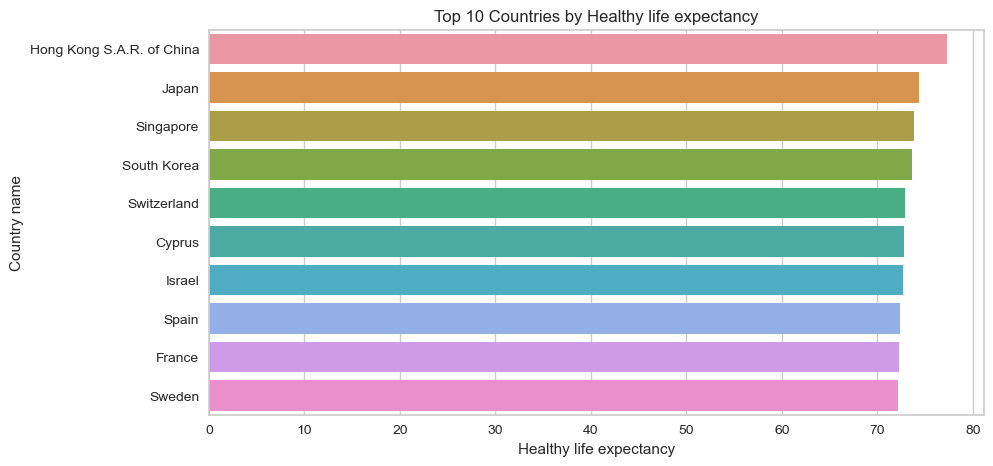

In [31]:
top_df=df.nlargest(10,"Healthy life expectancy")

plt.figure(figsize=(10,5))

sns.barplot(data=top_df, x="Healthy life expectancy",y="Country name")

plt.title("Top 10 Countries by Healthy life expectancy")


Text(0.5, 1.0, 'Top 10 Countries by Freedom to make life choices')

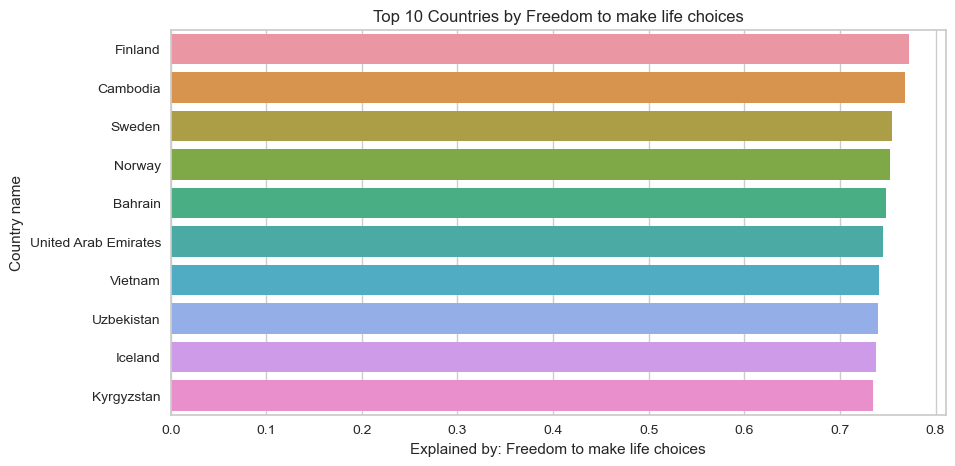

In [30]:
top_df=df.nlargest(10,"Explained by: Freedom to make life choices")

plt.figure(figsize=(10,5))

sns.barplot(data=top_df, x="Explained by: Freedom to make life choices",y="Country name")

plt.title("Top 10 Countries by Freedom to make life choices")

Text(0.5, 1.0, 'Top 10 Countries by Ladder score')

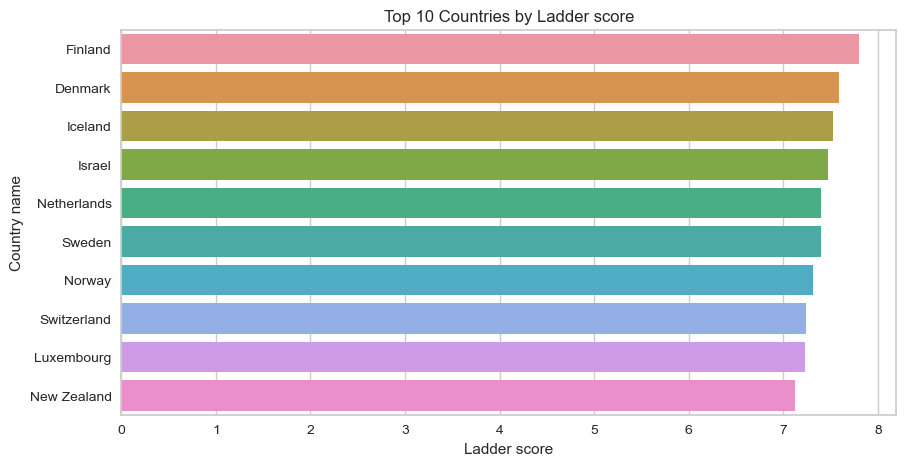

In [27]:
top_df=df.nlargest(10,"Ladder score")

plt.figure(figsize=(10,5))

sns.barplot(data=top_df, x="Ladder score",y="Country name")

plt.title("Top 10 Countries by Ladder score")

In [52]:
def plot_top_countries(df,column,n):
    
    top_df=df.nlargest(n,column)
    
    plt.figure(figsize=(10,5))

    top_df.plot.barh(x="Country name",y=column)

    plt.title(f"Top {n} Countries by {column}")
                     
    plt.xlabel(column)
    plt.ylabel("country Name")
    
    plt.show()

<Figure size 1000x500 with 0 Axes>

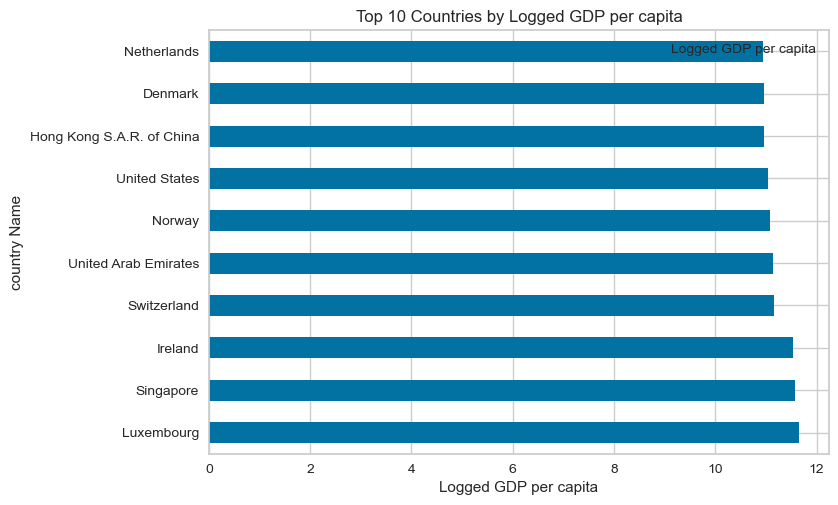

In [53]:
plot_top_countries(df,"Logged GDP per capita",10)

<Figure size 1000x500 with 0 Axes>

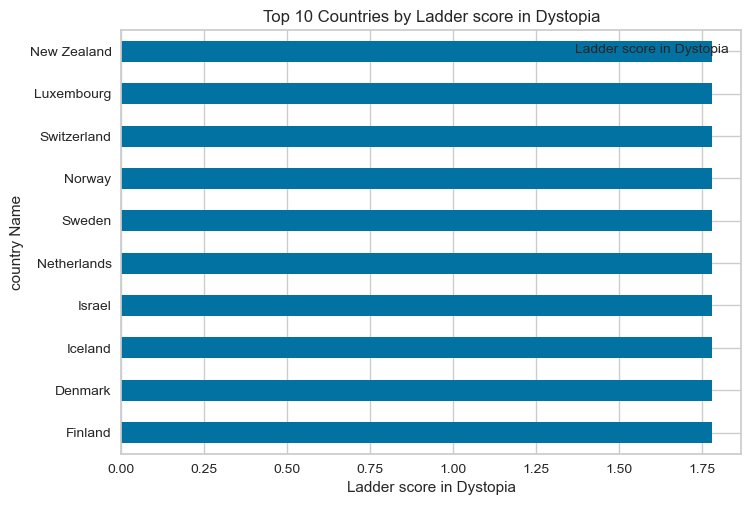

In [60]:
plot_top_countries(df,"Ladder score in Dystopia",10)

<AxesSubplot:>

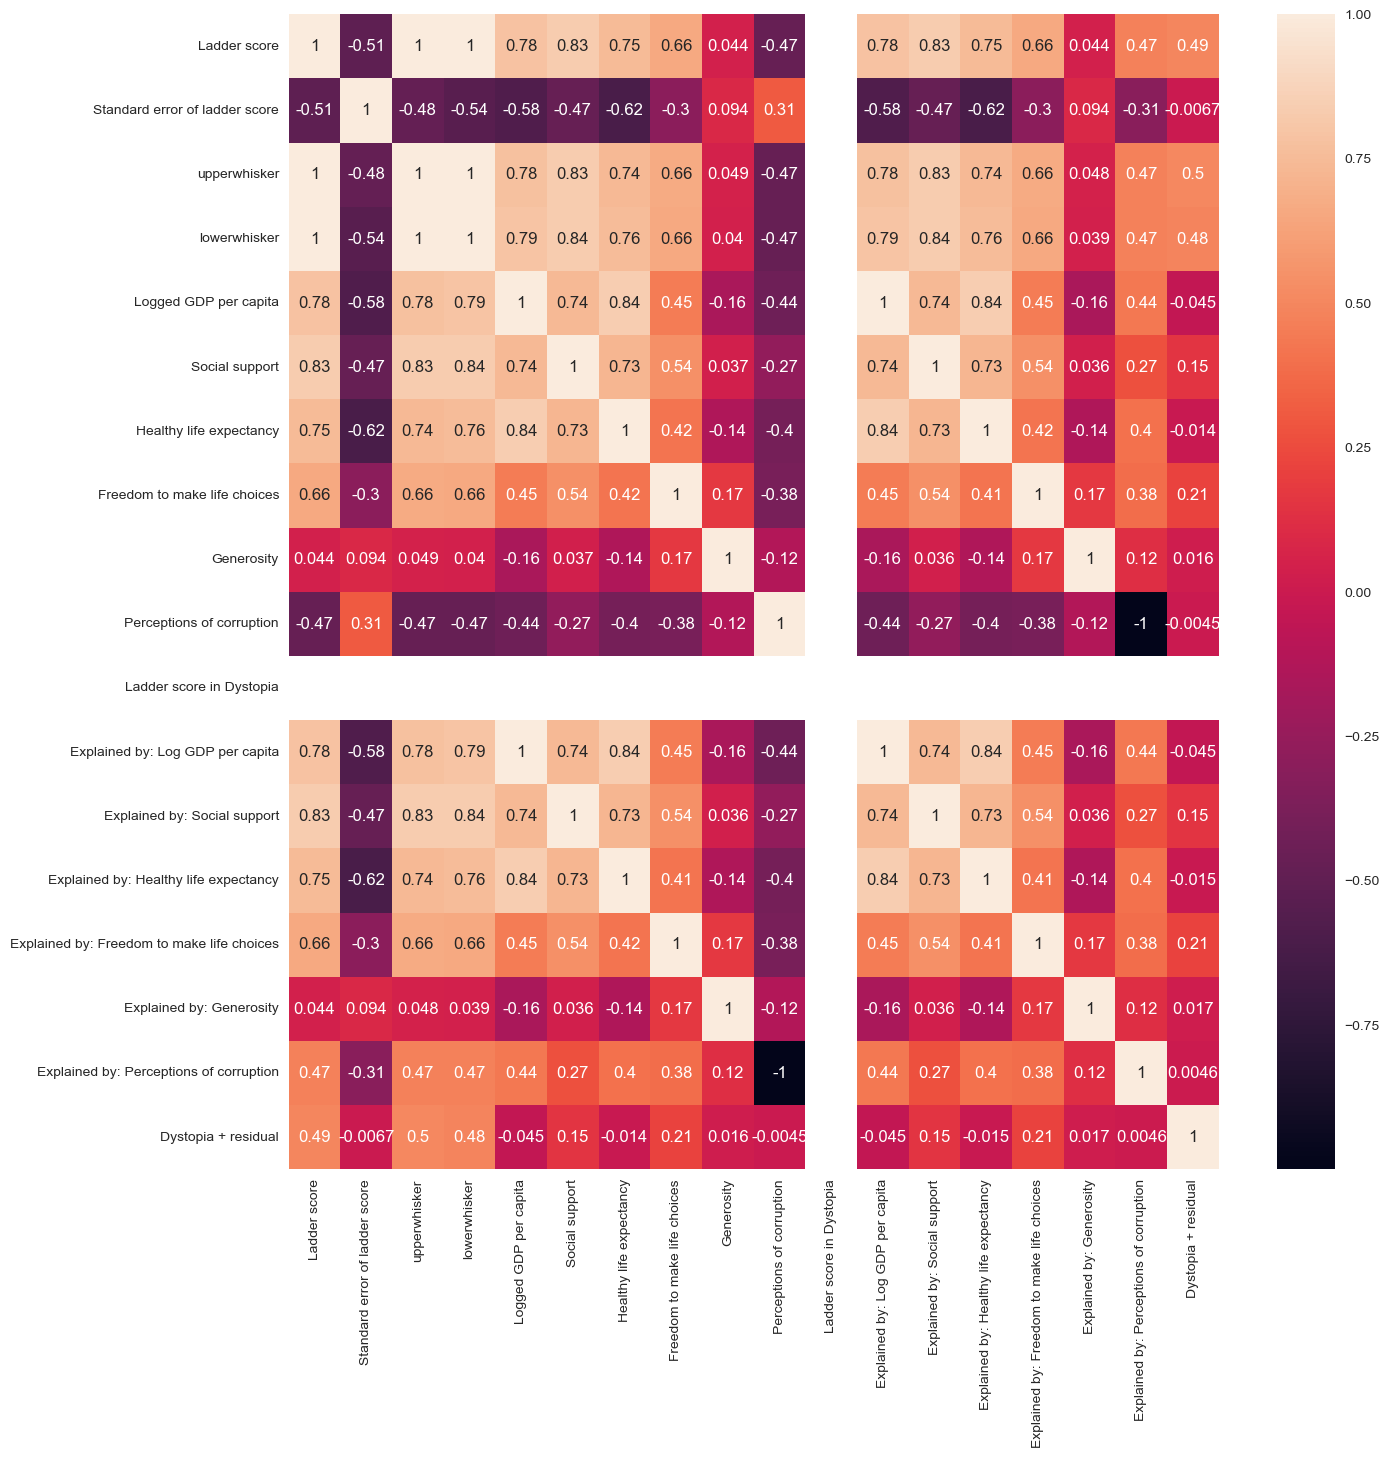

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [64]:
df.isnull().sum()

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

In [65]:
df[df["Healthy life expectancy"].isna()]

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
98,State of Palestine,4.908,0.092,5.089,4.727,8.716,0.859,NaN,0.694,-0.132,0.836,1.778,1.144,1.309,NaN,0.416,0.065,0.067,NaN


In [68]:
df.iloc[98]

Country name                                  State of Palestine
Ladder score                                               4.908
Standard error of ladder score                             0.092
upperwhisker                                               5.089
lowerwhisker                                               4.727
Logged GDP per capita                                      8.716
Social support                                             0.859
Healthy life expectancy                                      NaN
Freedom to make life choices                               0.694
Generosity                                                -0.132
Perceptions of corruption                                  0.836
Ladder score in Dystopia                                   1.778
Explained by: Log GDP per capita                           1.144
Explained by: Social support                               1.309
Explained by: Healthy life expectancy                        NaN
Explained by: Freedom to 

In [70]:
df=df.drop(98)

In [71]:
cont_features = [] #for continuous variable
cat_features = [] #for categrical variable

for i in df.columns:
    if df[i].dtype == "float64":
        cont_features += [i]
        
    else:
        cat_features += [i]

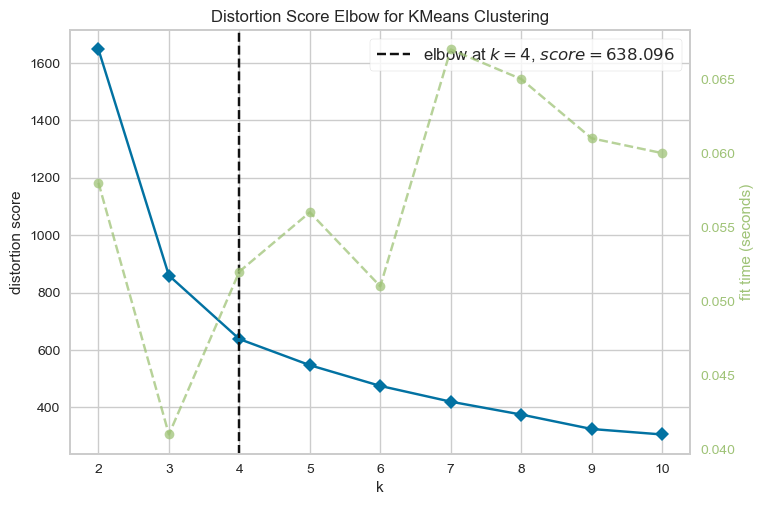

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
elbow = KElbowVisualizer(KMeans(),k=10)
elbow.fit(df[cont_features])
elbow.show()

In [73]:
kmeans = KMeans(n_clusters = 4,
                init = "k-means++",
                random_state = 0,
                n_init = 30,
               max_iter = 100)

In [74]:
clusters = kmeans.fit_predict(df[cont_features])

In [75]:
df["cluster"] = clusters

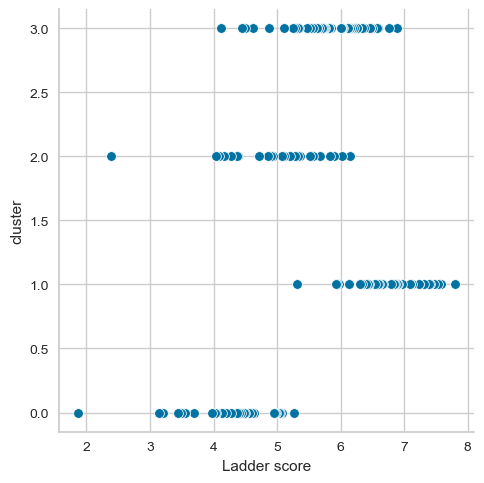

In [84]:
sns.relplot(x = "Ladder score",y="cluster",data = df, palette="Set3")

In [86]:
df.head(10)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,cluster
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363,1
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084,1
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250,1
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691,1
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110,1
5,Sweden,7.395,0.037,7.468,7.322,10.883,0.939,72.150,0.948,0.165,0.202,1.778,1.921,1.510,0.562,0.754,0.225,0.520,1.903,1
6,Norway,7.315,0.044,7.402,7.229,11.088,0.943,71.500,0.947,0.141,0.283,1.778,1.994,1.521,0.544,0.752,0.212,0.463,1.829,1
7,Switzerland,7.240,0.043,7.324,7.156,11.164,0.920,72.900,0.891,0.027,0.266,1.778,2.022,1.463,0.582,0.678,0.151,0.475,1.870,1
8,Luxembourg,7.228,0.069,7.363,7.093,11.660,0.879,71.675,0.915,0.024,0.345,1.778,2.200,1.357,0.549,0.710,0.149,0.418,1.845,1
9,New Zealand,7.123,0.038,7.198,7.048,10.662,0.952,70.350,0.887,0.175,0.271,1.778,1.842,1.544,0.513,0.672,0.230,0.471,1.852,1


In [88]:
df.sample(10)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,cluster
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084,1
131,Botswana,3.435,0.136,3.702,3.168,9.629,0.753,54.725,0.742,-0.215,0.830,1.778,1.471,1.041,0.087,0.480,0.021,0.071,0.264,0
122,Jordan,4.120,0.062,4.242,3.997,9.130,0.729,67.600,0.770,-0.150,0.687,1.778,1.292,0.980,0.438,0.517,0.056,0.173,0.663,3
95,Cameroon,4.973,0.071,5.112,4.834,8.217,0.686,55.847,0.686,0.015,0.846,1.778,0.965,0.871,0.118,0.405,0.144,0.059,2.411,0
130,Malawi,3.495,0.090,3.671,3.320,7.302,0.531,58.475,0.750,0.005,0.749,1.778,0.637,0.479,0.189,0.490,0.139,0.129,1.432,0
45,Cyprus,6.130,0.054,6.236,6.024,10.611,0.826,72.802,0.724,-0.060,0.860,1.778,1.824,1.224,0.580,0.455,0.104,0.050,1.893,1
62,Moldova,5.819,0.052,5.922,5.717,9.499,0.857,65.299,0.840,-0.080,0.901,1.778,1.425,1.302,0.375,0.610,0.093,0.020,1.995,3
124,Liberia,4.042,0.144,4.325,3.760,7.277,0.596,56.700,0.735,0.154,0.830,1.778,0.628,0.644,0.141,0.471,0.219,0.071,1.869,0
106,Ghana,4.605,0.063,4.729,4.481,8.596,0.641,58.763,0.777,0.139,0.881,1.778,1.101,0.756,0.197,0.526,0.211,0.035,1.779,0
68,Bolivia,5.684,0.057,5.797,5.572,8.985,0.811,63.599,0.868,-0.063,0.846,1.778,1.240,1.187,0.329,0.648,0.103,0.060,2.118,2


In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(np.log.(x.Ladder score),np.log(x))

In [89]:
df.groupby("cluster")["Country name"].unique()

cluster
0    [South Africa, Congo (Brazzaville), Guinea, Iv...
1    [Finland, Denmark, Iceland, Israel, Netherland...
2    [Guatemala, Honduras, Mauritius, Mongolia, Bol...
3    [United States, Lithuania, Romania, United Ara...
Name: Country name, dtype: object

In [93]:
third=df[df["cluster"]==3]

In [92]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


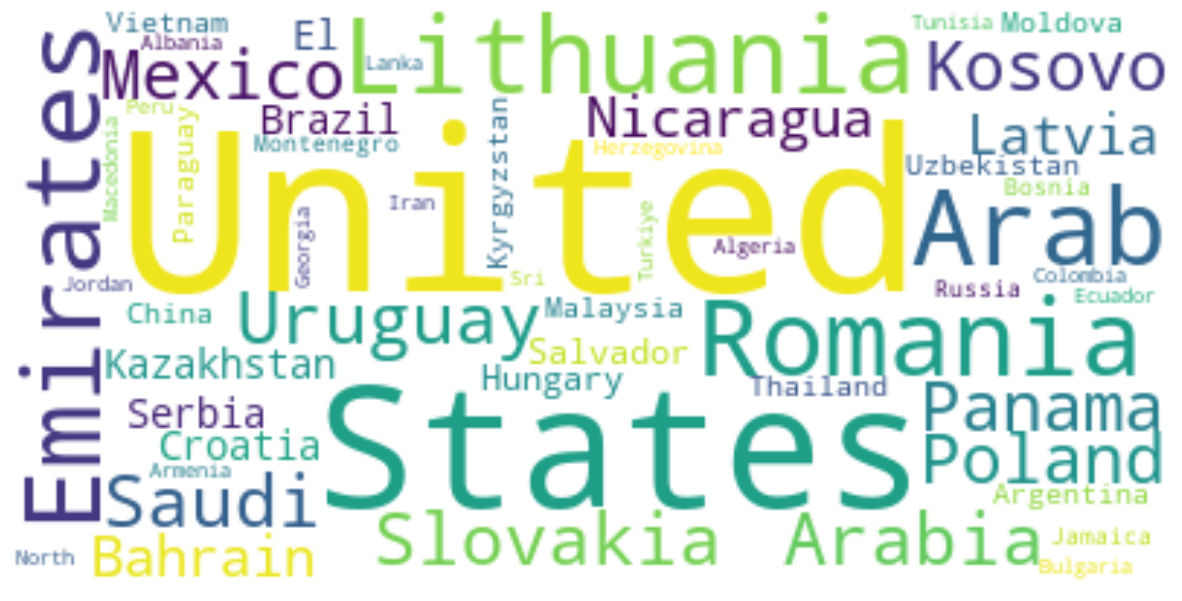

In [95]:
text = " ".join(i for i in third["Country name"])
stopwords=set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

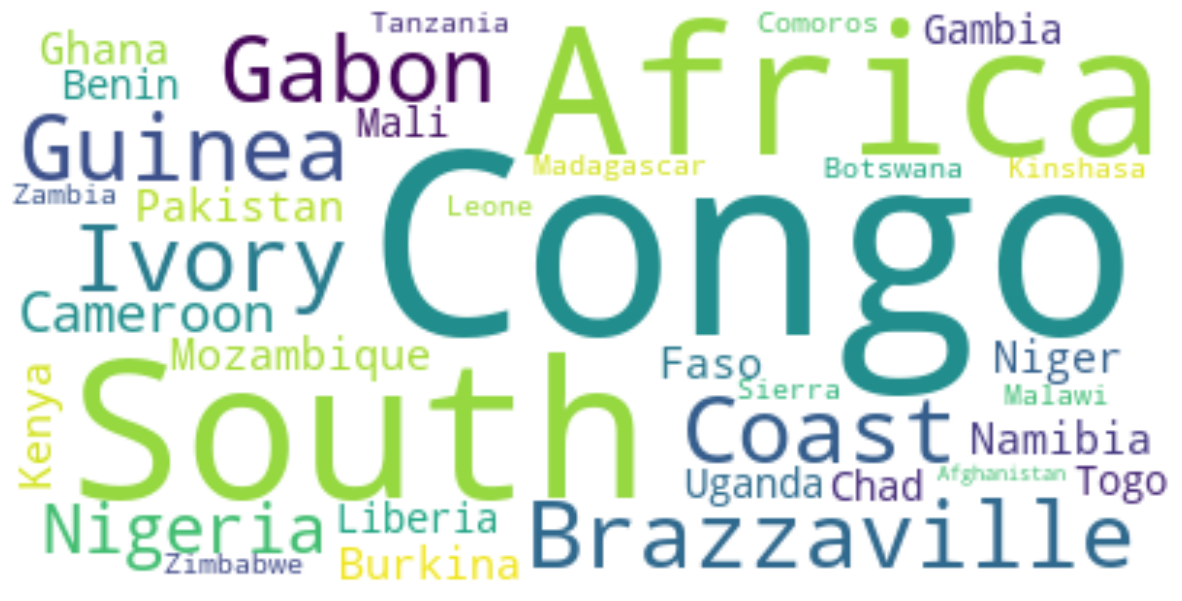

In [96]:
text = " ".join(i for i in df[df["cluster"]==0]["Country name"])
stopwords=set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

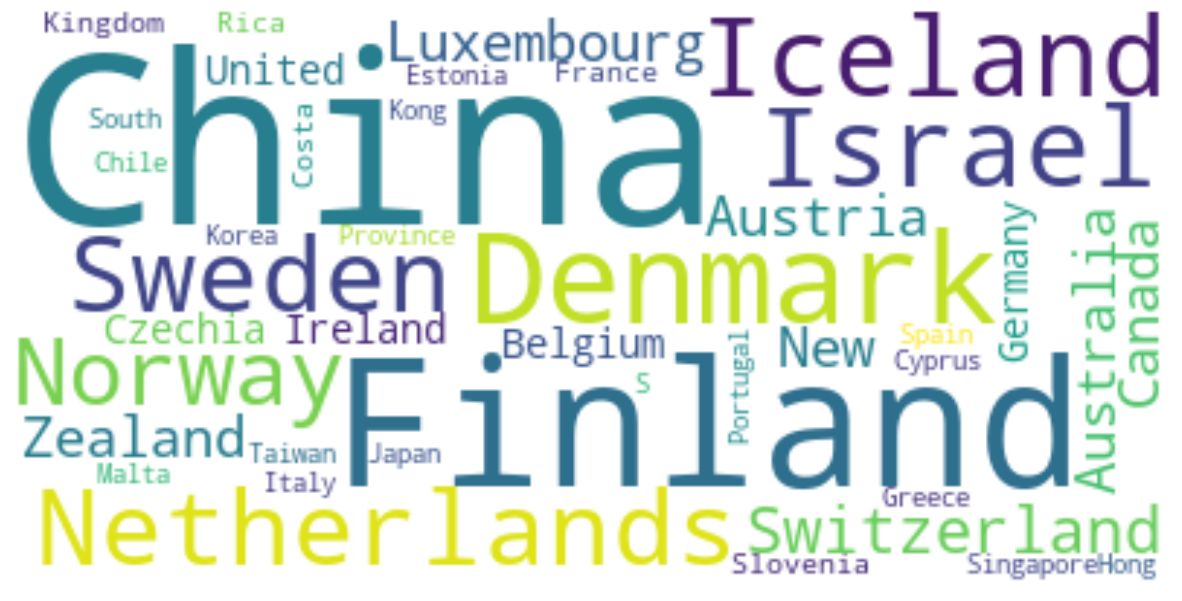

In [97]:
text = " ".join(i for i in df[df["cluster"]==1]["Country name"])
stopwords=set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

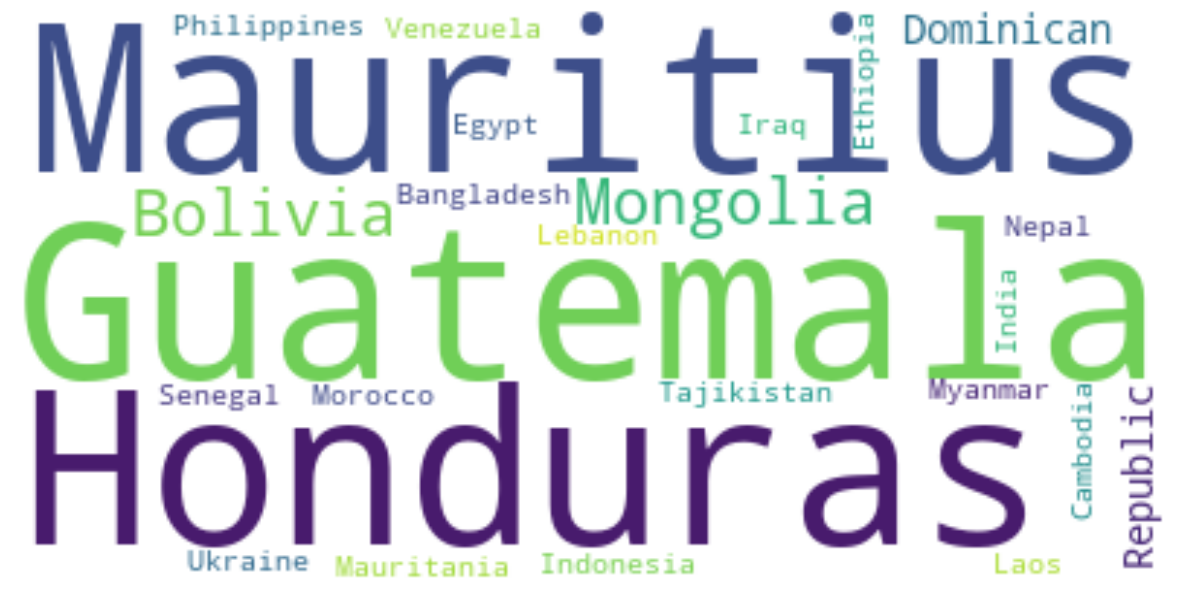

In [98]:
text = " ".join(i for i in df[df["cluster"]==2]["Country name"])
stopwords=set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()